### 加载数据集

In [12]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error,  r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
data = pd.DataFrame(boston['data'], columns=boston['feature_names'])
target = boston['target']

D:\Program Files\miniconda\envs\ds_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hou

### 查看数据

In [3]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


### 划分数据集

In [4]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

### 线性回归

In [21]:
linear = LinearRegression()
linear.fit(X_train, y_train)
linear_pred = linear.predict(X_test)

print(linear.coef_)
print(linear.intercept_)


evaluations = {
    'MSE': mean_squared_error(y_test, y_pred), 
    'MAE': mean_absolute_error(y_test, y_pred),
    'R^2': r2_score(y_test, y_pred),
}

[-1.12547035e-01  4.84580459e-02 -6.88007676e-03  2.76223150e+00
 -1.55777066e+01  4.47548255e+00 -1.02127677e-02 -1.50778065e+00
  2.45152843e-01 -1.00925706e-02 -9.37173367e-01  9.22522841e-03
 -4.27234635e-01]
30.567326416369077


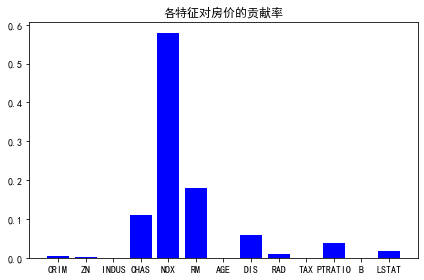

In [45]:
import matplotlib.pyplot as plt
coef = abs(model.coef_)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.bar(data.columns, coef/sum(coef), color='blue')
plt.title('各特征对房价的贡献率')
plt.tight_layout()
plt.show()

### Ridge回归

In [16]:
ridge = Ridge()
ridge.fit(X_train, y_train)
ridge_predict = ridge.predict(X_test)

### Lasso回归

In [17]:
lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_predict = lasso.predict(X_test)

### 学习曲线

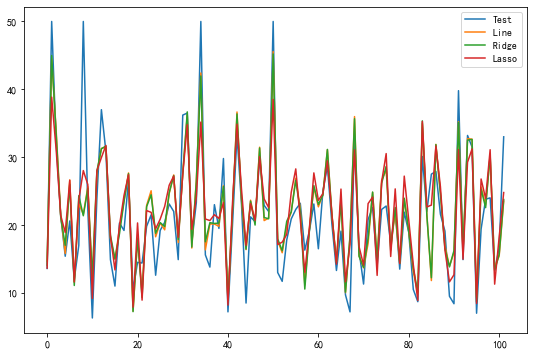

In [48]:
plt.figure(figsize=(9, 6))
plt.plot(y_test, label='Test')
plt.plot(linear_pred, label='Line')
plt.plot(ridge_predict, label='Ridge')
plt.plot(lasso_predict, label='Lasso')
plt.legend()
plt.show()

### 各模型的评估指标展示

In [47]:
criterions = ['MSE', 'MAE', 'R_square']
def calc_criterions(y_test, y_pred):
    return (mean_squared_error(y_test, y_pred),
              mean_absolute_error(y_test, y_pred),
              r2_score(y_test, y_pred))

df = pd.DataFrame([calc_criterions(linear_pred, y_test),
    calc_criterions(ridge_predict, y_test),
    calc_criterions(lasso_predict, y_test)], columns=criterions)
# df.append(calc_criterions(linear_pred, y_test))
df.index = ['Linear', 'Ridge', 'Lasso']
print(df)
print()

              MSE       MAE  R_square
Linear  24.286546  3.327087  0.600064
Ridge   24.773681  3.398037  0.590173
Lasso   24.890695  3.620470  0.503051
